In [93]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import glob
import pandas as pd
import math
import os
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from pyarrow.parquet import ParquetFile

In [3]:
url = "https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page"
response = requests.get(url)
if response.status_code == 200:
    print("Success")
else:
    print("Failure")

Success


In [4]:
import re
results_page = BeautifulSoup(response.content,'lxml')

#### get data from January 2009 through June 2015

In [5]:
def get_taxi_link():
    link_array = []
    pattern = r"(http.*yellow_tripdata_(20[0|1][0-9])-(0?\d*).parquet)"
    # pattern = "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2015-01.parquet"
    match = re.findall(pattern, str(results_page))
    for i in match:
        if int(i[1]) < 2015:
            link_array.append(i[0])
        elif int(i[1]) == 2015 and int(i[2]) <= 6:
            link_array.append(i[0])
    return link_array

In [6]:
link = get_taxi_link()
link

['https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2015-01.parquet',
 'https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2015-02.parquet',
 'https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2015-03.parquet',
 'https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2015-04.parquet',
 'https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2015-05.parquet',
 'https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2015-06.parquet',
 'https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2014-01.parquet',
 'https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2014-02.parquet',
 'https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2014-03.parquet',
 'https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2014-04.parquet',
 'https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2014-05.parquet',
 'https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2014-06.pa

In [7]:
pattern = r"yellow.*.parquet"
match = re.search(pattern, link[0])
match.group()

'yellow_tripdata_2015-01.parquet'

In [8]:
import os

if os.path.exists("yellow_tripdata_2009-01.parquet"):
    print("true")
else:
    print("doesn't exist")

true


download data to local folder

In [ ]:
import os

pattern = r"yellow.*.parquet"
for taxi_data_url in link:
    match = re.search(pattern, taxi_data_url)
    name_of_file = match.group()
    
    # to make sure we're not re-downloading the same file again
    if not os.path.exists(name_of_file):
        response = requests.get(taxi_data_url, stream=True)
        with open(name_of_file, 'wb') as f:
            for chunk in response.iter_content(chunk_size=1024):
                if chunk:
                    f.write(chunk)
                

In [ ]:
link[0]

#### get all column names to normalize columns

In [ ]:
import os
import re

import pandas as pd
from pyarrow.parquet import ParquetFile

pattern = r"yellow.*.parquet"
parquet_column_list = []

for file in os.listdir():
    match = re.match(pattern, file)
    if match:
        file_name = match.group()
        df = pd.read_parquet(file_name)
        column_name = df.columns.to_list()
        if column_name not in parquet_column_list:
            parquet_column_list.append(column_name)

In [ ]:
parquet_column_list

In [9]:
# we save the parquet column list so that later we don't need to 
parquet_column_list = [['VendorID',
  'tpep_pickup_datetime',
  'tpep_dropoff_datetime',
  'passenger_count',
  'trip_distance',
  'RatecodeID',
  'store_and_fwd_flag',
  'PULocationID',
  'DOLocationID',
  'payment_type',
  'fare_amount',
  'extra',
  'mta_tax',
  'tip_amount',
  'tolls_amount',
  'improvement_surcharge',
  'total_amount',
  'congestion_surcharge',
  'airport_fee'],
 ['vendor_name',
  'Trip_Pickup_DateTime',
  'Trip_Dropoff_DateTime',
  'Passenger_Count',
  'Trip_Distance',
  'Start_Lon',
  'Start_Lat',
  'Rate_Code',
  'store_and_forward',
  'End_Lon',
  'End_Lat',
  'Payment_Type',
  'Fare_Amt',
  'surcharge',
  'mta_tax',
  'Tip_Amt',
  'Tolls_Amt',
  'Total_Amt'],
 ['vendor_id',
  'pickup_datetime',
  'dropoff_datetime',
  'passenger_count',
  'trip_distance',
  'pickup_longitude',
  'pickup_latitude',
  'rate_code',
  'store_and_fwd_flag',
  'dropoff_longitude',
  'dropoff_latitude',
  'payment_type',
  'fare_amount',
  'surcharge',
  'mta_tax',
  'tip_amount',
  'tolls_amount',
  'total_amount']]

In [5]:
uber_data = pd.read_csv('uber_rides_sample.csv', index_col=0)
uber_data

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...
42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [6]:
# change the format of key to datetime
uber_data['key'] = pd.to_datetime(uber_data['key'])

examine how many rows are there for each year and month

In [12]:
examine_df = pd.concat([uber_data['key'].dt.year, uber_data['key'].dt.month], axis=1)
examine_df.columns = ['year', 'month']

In [13]:
examine_df.groupby(['year', 'month']).size()

year  month
2009  1        2555
      2        2292
      3        2703
      4        2574
      5        2660
               ... 
2015  2        2225
      3        2362
      4        2339
      5        2449
      6        2161
Length: 78, dtype: int64

In [14]:
# number of rows needed for each month
200000/78

2564.102564102564

#### according to the average number of rows in each month each year in the sample uber dataset, we do the following:
- sample 2600 columns from the yellow taxi dataset
- remove unecessary column and normalize the yellow taxi columns by mapping their names to match the uber dataset

In [15]:
import geopandas as gpd
shapefile = gpd.read_file("taxi_zones/taxi_zones.shp")
shapefile

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.770 256767.698, 1026495.593 ..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.310 144283.336, 936046.565 14..."
...,...,...,...,...,...,...,...
258,259,0.126750,0.000395,Woodlawn/Wakefield,259,Bronx,"POLYGON ((1025414.782 270986.139, 1025138.624 ..."
259,260,0.133514,0.000422,Woodside,260,Queens,"POLYGON ((1011466.966 216463.005, 1011545.889 ..."
260,261,0.027120,0.000034,World Trade Center,261,Manhattan,"POLYGON ((980555.204 196138.486, 980570.792 19..."
261,262,0.049064,0.000122,Yorkville East,262,Manhattan,"MULTIPOLYGON (((999804.795 224498.527, 999824...."


In [16]:
shapefile = shapefile.to_crs(4326)
shapefile['longitude'] = shapefile.centroid.x  
shapefile['latitude'] = shapefile.centroid.y
column_to_remove = ['Shape_Leng','Shape_Area','OBJECTID','geometry','zone','borough']
shapefile_new = shapefile.drop(columns=column_to_remove)


/var/folders/6q/g2p62ptx7bd62l9clms9bnhc0000gn/T/ipykernel_87028/4106857179.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shapefile['longitude'] = shapefile.centroid.x
/var/folders/6q/g2p62ptx7bd62l9clms9bnhc0000gn/T/ipykernel_87028/4106857179.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shapefile['latitude'] = shapefile.centroid.y


In [17]:
shapefile_new.loc[56, 'LocationID'] = 57
shapefile_new.loc[103, 'LocationID'] = 104
shapefile_new.loc[104, 'LocationID'] = 105

In [18]:
shapefile_new

,LocationID,longitude,latitude
0,1,-74.174000,40.691831
1,2,-73.831299,40.616745
2,3,-73.847422,40.864474
3,4,-73.976968,40.723752
4,5,-74.188484,40.552659
...,...,...,...
258,259,-73.852215,40.897932
259,260,-73.906306,40.744235
260,261,-74.013023,40.709139
261,262,-73.946510,40.775932


In [19]:
def get_center_long(locationid):
    if locationid in shapefile_new['LocationID']:
        return shapefile_new[shapefile_new['LocationID']==locationid]['longitude'].values[0]

def get_center_lat(locationid):
    if locationid in shapefile_new['LocationID']:
        return shapefile_new[shapefile_new['LocationID']==locationid]['latitude'].values[0]


#### find a file with LocationID instead of longitude to test if the get_center_long functions work or not

In [20]:
import os
import re

pattern = r"yellow.*.parquet"
for file in os.listdir():
    match = re.match(pattern, file)
    if match:
        file_name = match.group()
        df = pd.read_parquet(file_name)
        column_name = df.columns.to_list()
        if parquet_column_list.index(column_name) == 0:
            print(file_name)
        break

yellow_tripdata_2011-07.parquet


In [ ]:
import os
import re
yellow_taxi_data = pd.DataFrame()
pattern = r"yellow.*2011-07.parquet"

match = re.match(pattern, file)
pd.read_parquet(file_name)

In [ ]:
import os
import re
yellow_taxi_data = pd.DataFrame()


pattern = r"yellow.*2011-07.parquet"

count = 0
for file in os.listdir():
    match = re.match(pattern, file)
    if match:
        file_name = match.group()
        df = pd.read_parquet(file_name)
        sample_df = df.sample(3000)
        column_name = sample_df.columns.to_list()
        
        if parquet_column_list.index(column_name) == 0:
            sample_df_column_filtered = sample_df.loc[:,['fare_amount',
                                                         'tpep_pickup_datetime',
                                                          'passenger_count',
                                                          'PULocationID',
                                                          'DOLocationID']]
            #'PULocationID', 'DOLocationID' will be transformed to longitude and latitude
            #temp_df = sample_df_column_filteredPULocationID'] 
            sample_df_column_filtered = sample_df_column_filtered[sample_df_column_filtered['PULocationID'] != sample_df_column_filtered['DOLocationID']]
            sample_df_column_filtered['pickup_longitude'] = sample_df_column_filtered['PULocationID'].apply(get_center_long)
            sample_df_column_filtered['pickup_latitude'] = sample_df_column_filtered['PULocationID'].apply(get_center_lat)
            sample_df_column_filtered['dropoff_longitude'] = sample_df_column_filtered['DOLocationID'].apply(get_center_long)
            sample_df_column_filtered['dropoff_latitude'] = sample_df_column_filtered['DOLocationID'].apply(get_center_lat)
            
            sample_df_column_filtered = sample_df_column_filtered.dropna()
            sample_df_column_filtered = sample_df_column_filtered.drop(columns=['PULocationID','DOLocationID'])
            
            sample_df_column_filtered.columns = ['fare_amount', 'pickup_datetime', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']
            yellow_taxi_data = pd.concat([yellow_taxi_data, sample_df_column_filtered])
yellow_taxi_data




#### After testing it successfully on one file, we apply the function to the bigger function that will ingest every file

In [21]:
yellow_taxi_data = pd.DataFrame()
pattern = r"yellow.*.parquet"

count = 0
for file in os.listdir():
    match = re.match(pattern, file)
    if match:
        file_name = match.group()
        df = pd.read_parquet(file_name)
        sample_df = df.sample(2600)
        column_name = sample_df.columns.to_list()
        
        if parquet_column_list.index(column_name) == 0:
            sample_df_column_filtered = sample_df.loc[:,['fare_amount',
                                                         'tpep_pickup_datetime',
                                                         'passenger_count',
                                                         'PULocationID',
                                                         'DOLocationID']]
            #'PULocationID', 'DOLocationID' will be transformed to longitude and latitude
            sample_df_column_filtered = sample_df_column_filtered[sample_df_column_filtered['PULocationID'] != sample_df_column_filtered['DOLocationID']] 
            sample_df_column_filtered = sample_df_column_filtered[(sample_df_column_filtered['PULocationID']<=263)&(sample_df_column_filtered['DOLocationID']<=263)]
            sample_df_column_filtered['pickup_longitude'] = sample_df_column_filtered['PULocationID'].apply(get_center_long)
            sample_df_column_filtered['pickup_latitude'] = sample_df_column_filtered['PULocationID'].apply(get_center_lat)
            sample_df_column_filtered['dropoff_longitude'] = sample_df_column_filtered['DOLocationID'].apply(get_center_long)
            sample_df_column_filtered['dropoff_latitude'] = sample_df_column_filtered['DOLocationID'].apply(get_center_lat)
            sample_df_column_filtered = sample_df_column_filtered.drop(columns=['PULocationID','DOLocationID'])
            sample_df_column_filtered.columns = ['fare_amount', 'pickup_datetime', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']
        elif parquet_column_list.index(column_name) == 1:
            sample_df_column_filtered = sample_df.loc[:,[ 'Trip_Pickup_DateTime',            
                                                          'Passenger_Count',            
                                                          'Start_Lon',
                                                          'Start_Lat',              
                                                          'End_Lon',
                                                          'End_Lat',
                                                          'Fare_Amt']]
            sample_df_column_filtered.columns = ['pickup_datetime', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'fare_amount']
        elif parquet_column_list.index(column_name) == 2:
            sample_df_column_filtered = sample_df.loc[:,[ 'pickup_datetime',  
                                                          'passenger_count',
                                                          'pickup_longitude',
                                                          'pickup_latitude',
                                                          'dropoff_longitude',
                                                          'dropoff_latitude',  
                                                          'fare_amount']]
        yellow_taxi_data = pd.concat([yellow_taxi_data, sample_df_column_filtered])
        count += 1

In [22]:
yellow_taxi_data[yellow_taxi_data['pickup_longitude']==yellow_taxi_data['pickup_latitude']]

,fare_amount,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
11701015,10.1,2009-10-28 16:42:00,1,0.0,0.0,0.0,0.0
2754511,5.3,2009-10-07 18:23:03,1,0.0,0.0,0.0,0.0
3168910,9.7,2009-10-17 21:14:00,5,0.0,0.0,0.0,0.0
555256,5.7,2009-10-08 19:52:17,1,0.0,0.0,0.0,0.0
3326209,9.7,2009-10-29 11:25:00,2,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
9232229,7.7,2009-05-13 09:18:24,1,0.0,0.0,0.0,0.0
9285682,9.7,2009-05-13 02:52:00,3,0.0,0.0,0.0,0.0
9443263,6.1,2009-05-31 19:05:00,1,0.0,0.0,0.0,0.0
6469908,11.7,2009-05-01 22:57:10,1,0.0,0.0,0.0,0.0


according tho the above dataframe filtering, there're rows where pickup longitude and latitude are the same. Therefore, we will remove these in the final dataset

In [23]:
yellow_taxi_data = yellow_taxi_data[yellow_taxi_data['pickup_longitude']!=yellow_taxi_data['pickup_latitude']]


In [24]:
yellow_taxi_data = yellow_taxi_data[yellow_taxi_data['pickup_longitude'] > -74.242330]
yellow_taxi_data = yellow_taxi_data[yellow_taxi_data['pickup_longitude'] < -73.717047]
yellow_taxi_data = yellow_taxi_data[yellow_taxi_data['pickup_latitude'] > 40.560445]
yellow_taxi_data = yellow_taxi_data[yellow_taxi_data['pickup_latitude'] < 40.908524]




yellow_taxi_data = yellow_taxi_data[yellow_taxi_data['dropoff_longitude'] > -74.242330]
yellow_taxi_data = yellow_taxi_data[yellow_taxi_data['dropoff_longitude'] < -73.717047]
yellow_taxi_data = yellow_taxi_data[yellow_taxi_data['dropoff_latitude'] > 40.560445]
yellow_taxi_data = yellow_taxi_data[yellow_taxi_data['dropoff_latitude'] < 40.908524]

yellow_taxi_data

,fare_amount,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
4750658,25.7,2011-07-11 22:24:00,1,-73.988787,40.753513,-73.919308,40.866075
3299651,9.7,2011-07-08 20:12:18,1,-73.981532,40.773633,-73.977698,40.758028
5773274,14.1,2011-07-13 23:10:00,1,-73.985937,40.727620,-73.962364,40.687967
6819965,8.9,2011-07-15 23:22:00,2,-73.978492,40.747746,-73.995135,40.766238
243545,9.7,2011-07-01 14:05:00,2,-73.965480,40.801970,-73.941399,40.841709
...,...,...,...,...,...,...,...
7598799,2.5,2009-05-05 10:13:00,1,-73.983322,40.730368,-73.983312,40.730382
11330113,4.1,2009-05-18 23:30:00,1,-74.006310,40.739632,-74.003958,40.742023
9735197,8.1,2009-05-13 07:22:00,1,-73.985453,40.739410,-73.971335,40.764523
13234666,17.5,2009-05-17 16:48:54,1,-74.177775,40.690279,-74.177792,40.690277


In [3]:
#yellow_taxi_data.to_csv('yellow_taxi_data.csv', index=False)
yellow_taxi_data = pd.read_csv('yellow_taxi_data.csv')

In [4]:
yellow_taxi_data = yellow_taxi_data.drop('Unnamed: 0', axis=1)

In [189]:
yellow_taxi_data.head(5)

,fare_amount,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,distance
0,4.9,2011-07-04 03:24:05,1,-73.949540,40.729506,-73.957418,40.718804,1.362693
1,7.7,2011-07-21 09:47:00,1,-73.988787,40.753513,-73.997380,40.728340,2.891160
2,5.3,2011-07-05 08:50:05,1,-73.976495,40.740439,-73.984052,40.736824,0.752988
3,10.5,2011-07-11 12:40:14,1,-73.977698,40.758028,-73.996919,40.720889,4.435831
4,3.3,2011-07-03 07:50:00,5,-73.972356,40.756688,-73.978492,40.747746,1.120593


#### process uber-data

In [65]:
uber_data

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
24238194,2015-05-07 19:52:06.000000300,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
27835199,2009-07-17 20:04:56.000000200,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
44984355,2009-08-24 21:45:00.000000610,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
25894730,2009-06-26 08:22:21.000000100,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...
42598914,2012-10-28 10:49:00.000000530,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
16382965,2014-03-14 01:09:00.000000800,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
27804658,2009-06-29 00:42:00.000000780,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
20259894,2015-05-20 14:56:25.000000400,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [26]:
uber_data = uber_data[['fare_amount', 'passenger_count', 'pickup_datetime',
                       'pickup_latitude','pickup_longitude',
                       'dropoff_latitude','dropoff_longitude',
                      ]].copy()
uber_data['pickup_datetime'] = pd.to_datetime(uber_data['pickup_datetime'])


uber_data = uber_data[uber_data['pickup_longitude'] > -74.242330]
uber_data = uber_data[uber_data['pickup_longitude'] < -73.717047]
uber_data = uber_data[uber_data['pickup_latitude'] > 40.560445]
uber_data = uber_data[uber_data['pickup_latitude'] < 40.908524]




uber_data = uber_data[uber_data['dropoff_longitude'] > -74.242330]
uber_data = uber_data[uber_data['dropoff_longitude'] < -73.717047]
uber_data = uber_data[uber_data['dropoff_latitude'] > 40.560445]
uber_data = uber_data[uber_data['dropoff_latitude'] < 40.908524]

uber_data[uber_data['pickup_longitude']== uber_data['pickup_latitude']]
uber_data = uber_data[uber_data['pickup_longitude']!=uber_data['pickup_latitude']]

uber_data.head()


,fare_amount,passenger_count,pickup_datetime,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
24238194,7.5,1,2015-05-07 19:52:06+00:00,40.738354,-73.999817,40.723217,-73.999512
27835199,7.7,1,2009-07-17 20:04:56+00:00,40.728225,-73.994355,40.750325,-73.994710
44984355,12.9,1,2009-08-24 21:45:00+00:00,40.740770,-74.005043,40.772647,-73.962565
25894730,5.3,3,2009-06-26 08:22:21+00:00,40.790844,-73.976124,40.803349,-73.965316
17610152,16.0,5,2014-08-28 17:47:00+00:00,40.744085,-73.925023,40.761247,-73.973082


In [27]:
uber_data

,fare_amount,passenger_count,pickup_datetime,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
24238194,7.5,1,2015-05-07 19:52:06+00:00,40.738354,-73.999817,40.723217,-73.999512
27835199,7.7,1,2009-07-17 20:04:56+00:00,40.728225,-73.994355,40.750325,-73.994710
44984355,12.9,1,2009-08-24 21:45:00+00:00,40.740770,-74.005043,40.772647,-73.962565
25894730,5.3,3,2009-06-26 08:22:21+00:00,40.790844,-73.976124,40.803349,-73.965316
17610152,16.0,5,2014-08-28 17:47:00+00:00,40.744085,-73.925023,40.761247,-73.973082
...,...,...,...,...,...,...,...
42598914,3.0,1,2012-10-28 10:49:00+00:00,40.739367,-73.987042,40.740297,-73.986525
16382965,7.5,1,2014-03-14 01:09:00+00:00,40.736837,-73.984722,40.739620,-74.006672
27804658,30.9,2,2009-06-29 00:42:00+00:00,40.756487,-73.986017,40.692588,-73.858957
20259894,14.5,1,2015-05-20 14:56:25+00:00,40.725452,-73.997124,40.695415,-73.983215


In [90]:
uber_data.dtypes

fare_amount                      float64
passenger_count                    int64
pickup_datetime      datetime64[ns, UTC]
pickup_latitude                  float64
pickup_longitude                 float64
dropoff_latitude                 float64
dropoff_longitude                float64
distance                         float64
dtype: object

#### Calculate distance

In [21]:
def calculate_dist(coord1,coord2):
    lat1, lon1 = coord1
    lat2, lon2 = coord2
    R = 6371 

    lat1_rad = math.radians(lat1)
    lon1_rad = math.radians(lon1)
    lat2_rad = math.radians(lat2)
    lon2_rad = math.radians(lon2)

    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad

    a = math.sin(dlat/2)**2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(dlon/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))

    distance = R * c
    return distance

In [41]:
uber_data['distance'] = uber_data.apply(lambda row: calculate_dist((row['pickup_latitude'], row['pickup_longitude']), (row['dropoff_latitude'], row['dropoff_longitude'])), axis=1)

yellow_taxi_data['distance'] = yellow_taxi_data.apply(lambda row: calculate_dist((row['pickup_latitude'], row['pickup_longitude']), (row['dropoff_latitude'], row['dropoff_longitude'])), axis=1)

uber_data.head()


,fare_amount,passenger_count,pickup_datetime,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,distance
24238194,7.5,1,2015-05-07 19:52:06+00:00,40.738354,-73.999817,40.723217,-73.999512,1.683323
27835199,7.7,1,2009-07-17 20:04:56+00:00,40.728225,-73.994355,40.750325,-73.994710,2.457590
44984355,12.9,1,2009-08-24 21:45:00+00:00,40.740770,-74.005043,40.772647,-73.962565,5.036377
25894730,5.3,3,2009-06-26 08:22:21+00:00,40.790844,-73.976124,40.803349,-73.965316,1.661683
17610152,16.0,5,2014-08-28 17:47:00+00:00,40.744085,-73.925023,40.761247,-73.973082,4.475450


### Processing Weather data

In [9]:
data = None
for filename in os.listdir('./weather_data/'):
    data = pd.concat([data, pd.read_csv(os.path.join('./weather_data',filename),low_memory=False)], axis=0)
data['DATE'] = pd.to_datetime(data['DATE'])
data['date'] = data['DATE'].dt.date
data['year'] = data['DATE'].dt.year
data['month'] = data['DATE'].dt.month
data['day'] = data['DATE'].dt.day
data['hour'] = data['DATE'].dt.hour
data['HourlyPrecipitation'] = data['HourlyPrecipitation'].fillna(0)
data['HourlyPrecipitation'] = pd.to_numeric(data['HourlyPrecipitation'],errors='coerce')
data['HourlyPrecipitation'] = data['HourlyPrecipitation'].apply(lambda x: float(str(x).replace('s', '')))
data['DailySustainedWindSpeed'] = data['DailySustainedWindSpeed'].fillna(0)
data['HourlyWindSpeed'] = data['HourlyWindSpeed'].fillna(0)
data = data.replace(['T'], 0)
#cols = ['date','year','month','day','hour','HourlyPrecipitation', 'HourlyWindSpeed','DailySustainedWindSpeed']
cols = ['date','year','month','day','hour','HourlyPrecipitation', 'HourlyWindSpeed','DailySustainedWindSpeed']
data = data[cols]

In [10]:
data

,date,year,month,day,hour,HourlyPrecipitation,HourlyWindSpeed,DailySustainedWindSpeed
0,2012-01-01,2012,1,1,0,0.0,6.0,0.0
1,2012-01-01,2012,1,1,1,0.0,7.0,0.0
2,2012-01-01,2012,1,1,2,0.0,6.0,0.0
3,2012-01-01,2012,1,1,3,0.0,5.0,0.0
4,2012-01-01,2012,1,1,4,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
10460,2010-12-31,2010,12,31,19,0.0,5.0,0.0
10461,2010-12-31,2010,12,31,20,0.0,7.0,0.0
10462,2010-12-31,2010,12,31,21,0.0,7.0,0.0
10463,2010-12-31,2010,12,31,22,0.0,6.0,0.0


In [11]:
def myfun(x):
    daily_precipitation = x['HourlyPrecipitation'].sum()
    daily_wind_speed = x['HourlyWindSpeed'].mean()
    year = x['year'].iloc[0]
    month = x['month'].iloc[0]
    day = x['day'].iloc[0]
    dailysustained_wind_speed = x['DailySustainedWindSpeed'].max() 
    return pd.DataFrame([[year, month,day,daily_precipitation, daily_wind_speed, dailysustained_wind_speed]],
                        columns=['year', 'month','day','DailyPrecipitation', 'DailyWindSpeed', 'DailySustainedWindSpeed'])

daily = data.groupby(['date']).apply(myfun)

daily = daily.reset_index().rename(columns={'level_1': 'index'})[['date', 'year', 'month','day', 'DailyPrecipitation', 'DailyWindSpeed','DailySustainedWindSpeed']]

In [12]:
daily

,date,year,month,day,DailyPrecipitation,DailyWindSpeed,DailySustainedWindSpeed
0,2009-01-01,2009,1,1,0.00,11.041667,0.0
1,2009-01-02,2009,1,2,0.00,6.593750,0.0
2,2009-01-03,2009,1,3,0.00,9.875000,0.0
3,2009-01-04,2009,1,4,0.00,7.370370,0.0
4,2009-01-05,2009,1,5,0.00,6.925926,0.0
...,...,...,...,...,...,...,...
2546,2015-12-27,2015,12,27,0.17,4.604167,15.0
2547,2015-12-28,2015,12,28,0.03,7.576923,18.0
2548,2015-12-29,2015,12,29,0.93,7.625000,18.0
2549,2015-12-30,2015,12,30,0.29,4.076923,9.0


## Part 2: Storing Data

In [83]:
import sqlalchemy as db

engine = db.create_engine(f"sqlite:///project.db")
connection = engine.connect()
schema_file = 'schema.sql'

### Create 4 schema for database

In [73]:
UBER_DATA_SCHEMA = """
CREATE TABLE IF NOT EXISTS uber_data
(
    id INTEGER PRIMARY KEY,
    fare_amount FLOAT64,
    passenger_count INTEGER,
    pickup_datetime DATETIME,
    pickup_latitude FLOAT64,
    pickup_longitude FLOAT64,
    dropoff_latitude FLOAT64,
    dropoff_longitude FLOAT64,
    distance FLOAT64
);
"""

TAXI_DATA_SCHEMA = """
CREATE TABLE IF NOT EXISTS taxi_data
(
    id INTEGER PRIMARY KEY,
    fare_amount FLOAT64,
    passenger_count INTEGER,
    pickup_datetime DATETIME,
    pickup_latitude FLOAT64,
    pickup_longitude FLOAT64,
    dropoff_latitude FLOAT64,
    dropoff_longitude FLOAT64,
    distance FLOAT64
);
"""


In [74]:
HOURLY_WEATHER_DATA_SCHEMA = """
CREATE TABLE IF NOT EXISTS hourly_data
(
    id INTEGER PRIMARY KEY,
    DATE DATE,
    year INTEGER,
    month INTEGER,
    day INTEGER,
    hour INTEGER,
    HourlyWindSpeed FLOAT64,
    HourlyPrecipitation FLOAT64
);
"""

DAILY_WEATHER_DATA_SCHEMA = """
CREATE TABLE IF NOT EXISTS daily_data
(
    id INTEGER PRIMARY KEY,
    DATE DATE,
    year INTEGER,
    month INTEGER,
    day INTEGER,
    DailyPrecipitation FLOAT64,
    DailyWindSpeed FLOAT64,
    DailySustainedWindSpeed REAL
    
);
"""



In [75]:
with open(schema_file, 'w') as file:
    file.write(UBER_DATA_SCHEMA)
    file.write(TAXI_DATA_SCHEMA)
    file.write(HOURLY_WEATHER_DATA_SCHEMA)
    file.write(DAILY_WEATHER_DATA_SCHEMA)

In [76]:
with open(schema_file, 'r') as file:
    queries = file.read()
    query_list = queries.split(';')
    for query in query_list:
        engine.execute(query)

### populate the database with dataframes

In [77]:
uber_data.to_sql('uber_data', engine, if_exists='append', index=False)

195472

In [78]:
yellow_taxi_data.to_sql('taxi_data', engine, if_exists='replace', index=False)

186242

In [81]:
data.to_sql(name='hourly_data', con=engine, if_exists='replace', index=False)


77972

In [80]:
daily.to_sql(name='daily_data', con=engine, if_exists='replace', index=False)

2551

In [43]:
# engine.execute("SELECT * FROM taxi_data").fetchall()

In [ ]:
# engine.execute("SELECT fare_amount FROM uber_data").fetchall()

In [ ]:
# engine.execute("SELECT fare_amount FROM taxi_data").fetchall()

### Part 4 Visualization 

#### 1. Create an appropriate visualization for the first query/question in part 3.


#### 2. Create a visualization that shows the average distance traveled per month (regardless of year - so group by each month) for both taxis and Ubers combined. Include the 90% confidence interval around the mean in the visualization.

In [122]:
def combined_data():
    query = """
    SELECT strftime('%m', pickup_datetime) AS month, 'taxi' as type, AVG(distance) as avg_dis, COUNT(distance) as count, 
        (SUM(distance * distance) / COUNT(distance) - AVG(distance) * AVG(distance)) as variance
    FROM taxi_data
    GROUP BY month
    UNION ALL
    SELECT strftime('%m', pickup_datetime) AS month, 'uber' as type, AVG(distance) as avg_dis, COUNT(distance) as count, 
        (SUM(distance * distance) / COUNT(distance) - AVG(distance) * AVG(distance)) as variance
    FROM uber_data
    GROUP BY month
    """
    df = pd.read_sql_query(query, conn)
    df['stddev'] = np.sqrt(df['variance'])
    return df



/var/folders/6q/g2p62ptx7bd62l9clms9bnhc0000gn/T/ipykernel_2351/3006536071.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi_df['ci_lower'], taxi_df['ci_upper'] = zip(*taxi_df.apply(lambda x: confidence_interval(x['avg_dis'], x['stddev'], x['count']), axis=1))
/var/folders/6q/g2p62ptx7bd62l9clms9bnhc0000gn/T/ipykernel_2351/3006536071.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi_df['ci_lower'], taxi_df['ci_upper'] = zip(*taxi_df.apply(lambda x: confidence_interval(x['avg_dis'], x['stddev

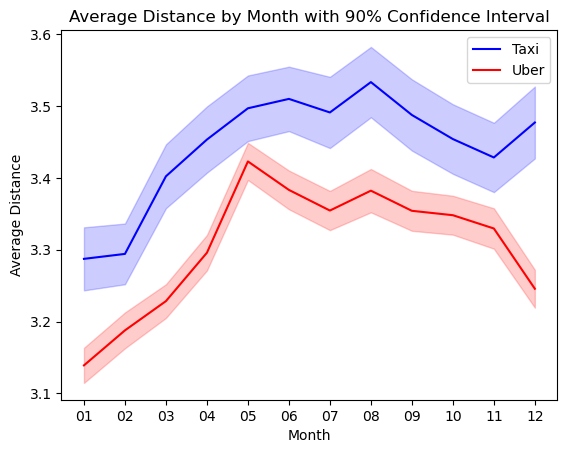

In [123]:
def confidence_interval(mean, stddev, count, confidence=0.9):
    se = stddev / np.sqrt(count)
    z = np.percentile(np.random.standard_normal(10000), (1 - confidence) * 100 / 2 + confidence * 100)
    h = se * z
    return mean - h, mean + h

df = combined_data()

taxi_df = df[df['type'] == 'taxi']
uber_df = df[df['type'] == 'uber']

taxi_df['ci_lower'], taxi_df['ci_upper'] = zip(*taxi_df.apply(lambda x: confidence_interval(x['avg_dis'], x['stddev'], x['count']), axis=1))
uber_df['ci_lower'], uber_df['ci_upper'] = zip(*uber_df.apply(lambda x: confidence_interval(x['avg_dis'], x['stddev'], x['count']), axis=1))

def plot_with_ci(df, label, color):
    plt.plot(df['month'], df['avg_dis'], label=label, color=color)
    plt.fill_between(df['month'], df['ci_lower'], df['ci_upper'], color=color, alpha=0.2)

plot_with_ci(taxi_df, 'Taxi', 'blue')
plot_with_ci(uber_df, 'Uber', 'red')

plt.xlabel('Month')
plt.ylabel('Average Distance')
plt.title('Average Distance by Month with 90% Confidence Interval')
plt.legend(loc='upper right')

plt.show()


#### 3. Define three lat/long coordinate boxes around the three major New York airports: LGA, JFK, and EWR. Create a visualization that compares what day of the week was most popular for drop offs for each airport. 

In [183]:
def dropoff_data(database_path):
    connection = sqlite3.connect(database_path)
    
    LGA = (40.760813, -73.903141, 40.787463, -73.841343)
    JFK = (40.639722, -73.794853, 40.671111, -73.776944) 
    EWR = (40.671199, -74.181919, 40.707710, -74.174336)

    base_query = """
        SELECT * FROM (
            SELECT * FROM uber_data
            UNION ALL
            SELECT * FROM taxi_data
        ) WHERE
    """

    lga_query = f"""
        {base_query}
            (dropoff_latitude BETWEEN {LGA[0]} AND {LGA[2]} AND dropoff_longitude BETWEEN {LGA[1]} AND {LGA[3]});
    """
    jfk_query = f"""
        {base_query}
            (dropoff_latitude BETWEEN {JFK[0]} AND {JFK[2]} AND dropoff_longitude BETWEEN {JFK[1]} AND {JFK[3]});
    """
    ewr_query = f"""
        {base_query}
            (dropoff_latitude BETWEEN {EWR[0]} AND {EWR[2]} AND dropoff_longitude BETWEEN {EWR[1]} AND {EWR[3]});
    """

    lga_df = pd.read_sql_query(lga_query, connection)
    jfk_df = pd.read_sql_query(jfk_query, connection)
    ewr_df = pd.read_sql_query(ewr_query, connection)

    connection.close()

    return lga_df, jfk_df, ewr_df



In [184]:
database_path = "project.db"
lga_df, jfk_df, ewr_df = dropoff_data(database_path)

In [186]:
def count_customers_by_day(df):
    df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
    df['day_of_week'] = df['pickup_datetime'].dt.day_name()
    return df.groupby('day_of_week')['passenger_count'].sum()

lga_counts = count_customers_by_day(lga_df)
jfk_counts = count_customers_by_day(jfk_df)
ewr_counts = count_customers_by_day(ewr_df)

new_df = pd.concat([lga_counts,jfk_counts,ewr_counts])

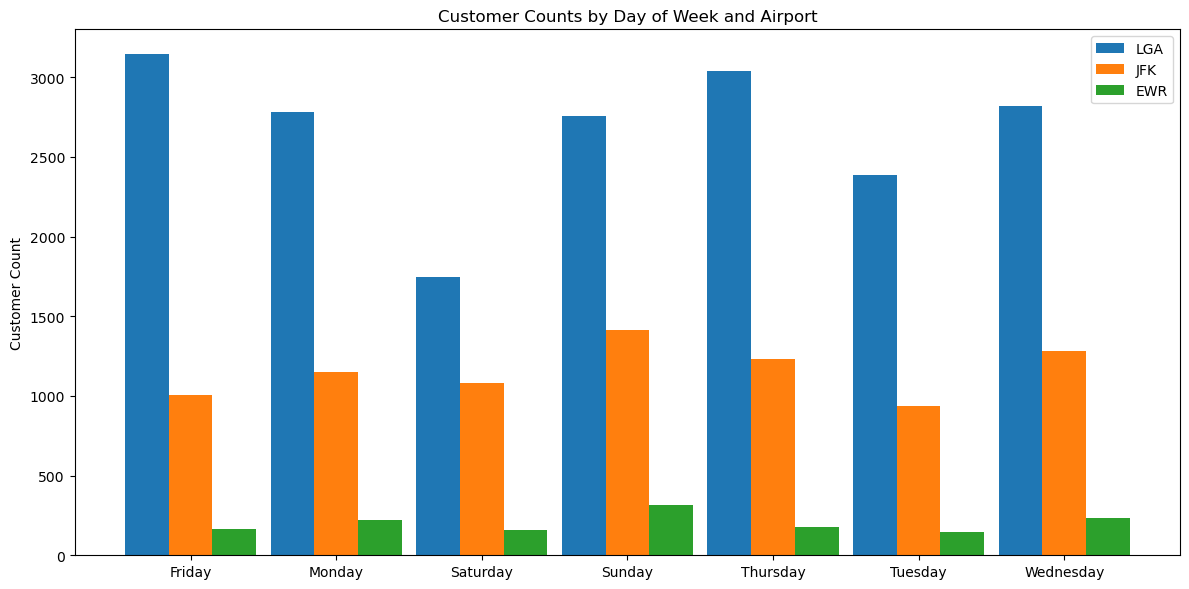

In [188]:
def plot_customer_counts(lga_counts, jfk_counts, ewr_counts):
    labels = lga_counts.index.intersection(jfk_counts.index).intersection(ewr_counts.index)
    lga_values = lga_counts[labels].values
    jfk_values = jfk_counts[labels].values
    ewr_values = ewr_counts[labels].values

    x = np.arange(len(labels))
    width = 0.3

    fig, ax = plt.subplots(figsize=(12, 6))
    rects1 = ax.bar(x - width, lga_values, width, label='LGA')
    rects2 = ax.bar(x, jfk_values, width, label='JFK')
    rects3 = ax.bar(x + width, ewr_values, width, label='EWR')

    ax.set_ylabel('Customer Count')
    ax.set_title('Customer Counts by Day of Week and Airport')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    fig.tight_layout()
    plt.show()


plot_customer_counts(lga_counts, jfk_counts, ewr_counts)


#### 4. Create a heatmap of all hired trips over a map of the area. Consider using Folium or KeplerGL or another library that helps generate geospatial visualizations.

#### 5. Create a scatter plot that compares tip amount versus distance for Yellow Taxi rides. You may remove any outliers how you see fit.